<a href="https://colab.research.google.com/github/YagyanshB/500-data-science-projects/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# About Dataset:

**Customer Personality Analysis** involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a **Customer Personality Analysis**, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

# Dataset Features:

1.  **Id:** Unique identifier for each individual in the dataset.
2.  **Year_Birth:** The birth year of the individual.
3.  **Education:** The highest level of education attained by the individual.
4.  **Marital_Status:** The marital status of the individual.
5. **Income:** The annual income of the individual.
6. **Kidhome:** The number of young children in the household.
7. **Teenhome:** The number of teenagers in the household.
8. **Dt_Customer:** The date when the customer was first enrolled or became a part of the company's database.
9. **Recency:** The number of days since the last purchase or interaction.
10. **MntWines:** The amount spent on wines.
11. **MntFruits:** The amount spent on fruits.
12. **MntMeatProducts:** The amount spent on meat products.
13. **MntFishProducts:** The amount spent on fish products.
14. **MntSweetProducts:** The amount spent on sweet products.
15. **MntGoldProds:** The amount spent on gold products.
16. **NumDealsPurchases:** The number of purchases made with a discount or as part of a deal.
17. **NumWebPurchases:** The number of purchases made through the company's website.
18. **NumCatalogPurchases:** The number of purchases made through catalogs.
19. **NumStorePurchases:** The number of purchases made in physical stores.
20. **NumWebVisitsMonth:** The number of visits to the company's website in a month.
21. **AcceptedCmp3:** Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
22. **AcceptedCmp4:** Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
23. **AcceptedCmp5:** Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
24. **AcceptedCmp1:** Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
25. **AcceptedCmp2:** Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
26. **Complain:** Binary indicator (1 or 0) whether the individual has made a complaint.
27. **Z_CostContact:** A constant cost associated with contacting a customer.
28. **Z_Revenue:** A constant revenue associated with a successful campaign response.
29. **Response:** Binary indicator (1 or 0) whether the individual responded to the marketing campaign.



# Importing Libraries:

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Uploading our Dataset:

In [14]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-clustering


# Investigating our Dataset:

In [10]:
# showcasing maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

'/kaggle/input/customer-segmentation-clustering'

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
df.shape

(2216, 29)

In [16]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


# Feature Engineering and Data Type Transformation:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [21]:
df['Age'] = 2025 - df['Year_Birth']

In [23]:
df['Total Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [24]:
df['Customer Since'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days

In [27]:
df['Total Children'] = df['Kidhome'] + df['Teenhome']

In [28]:
cols_to_drop = ['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                'Kidhome', 'Teenhome', 'Dt_Customer']

In [29]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Recency              2216 non-null   int64  
 5   NumDealsPurchases    2216 non-null   int64  
 6   NumWebPurchases      2216 non-null   int64  
 7   NumCatalogPurchases  2216 non-null   int64  
 8   NumStorePurchases    2216 non-null   int64  
 9   NumWebVisitsMonth    2216 non-null   int64  
 10  AcceptedCmp3         2216 non-null   int64  
 11  AcceptedCmp4         2216 non-null   int64  
 12  AcceptedCmp5         2216 non-null   int64  
 13  AcceptedCmp1         2216 non-null   int64  
 14  AcceptedCmp2         2216 non-null   int64  
 15  Complain             2216 non-null   int64 

In [32]:
df['Marketing Campaigns Acceptance'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']

In [33]:
cols_to_drop_again = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

In [34]:
df.drop(cols_to_drop_again, axis = 1, inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2216 non-null   int64  
 1   Education                       2216 non-null   object 
 2   Marital_Status                  2216 non-null   object 
 3   Income                          2216 non-null   float64
 4   Recency                         2216 non-null   int64  
 5   NumDealsPurchases               2216 non-null   int64  
 6   NumWebPurchases                 2216 non-null   int64  
 7   NumCatalogPurchases             2216 non-null   int64  
 8   NumStorePurchases               2216 non-null   int64  
 9   NumWebVisitsMonth               2216 non-null   int64  
 10  Complain                        2216 non-null   int64  
 11  Z_CostContact                   2216 non-null   int64  
 12  Z_Revenue                       2216 no

In [61]:
features = ['Age', 'Income', 'Total Spending', 'Customer Since', 'Total Children', 'Marketing Campaigns Acceptance']

In [62]:
correlation = df[features].corr()

In [64]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Customer Since,Total Children,Marketing Campaigns Acceptance
0,5524,Graduation,Single,58138.0,58,3,8,10,4,7,0,3,11,1,68,1617,4743,0,0
1,2174,Graduation,Single,46344.0,38,2,1,1,2,5,0,3,11,0,71,27,4193,2,0
2,4141,Graduation,Together,71613.0,26,1,8,2,10,4,0,3,11,0,60,776,4392,0,0
3,6182,Graduation,Together,26646.0,26,2,2,0,4,6,0,3,11,0,41,53,4219,1,0
4,5324,PhD,Married,58293.0,94,5,5,3,6,5,0,3,11,0,44,422,4241,1,0


# Data Visualisations:

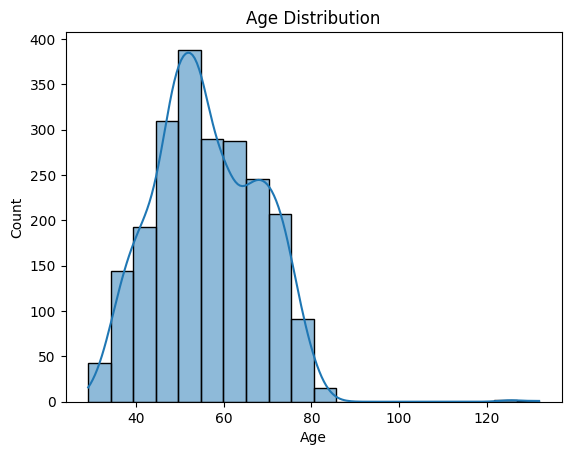

In [75]:
sns.histplot(df['Age'],bins = 20, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

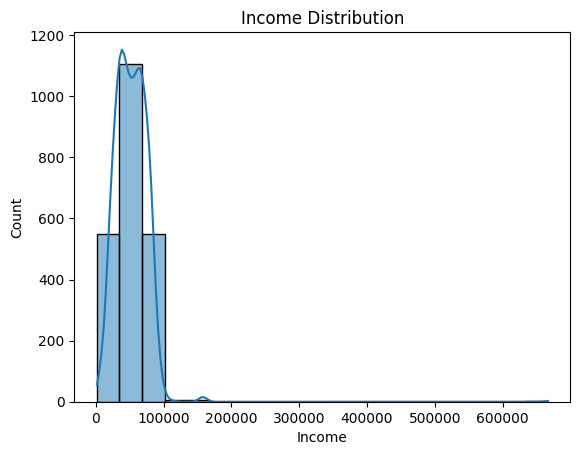

In [76]:
sns.histplot(df['Income'],bins = 20, kde = True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

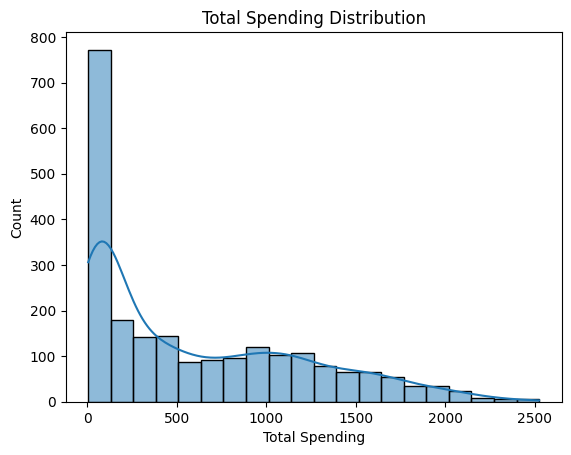

In [77]:
sns.histplot(df['Total Spending'],bins = 20, kde = True)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Count')
plt.show()

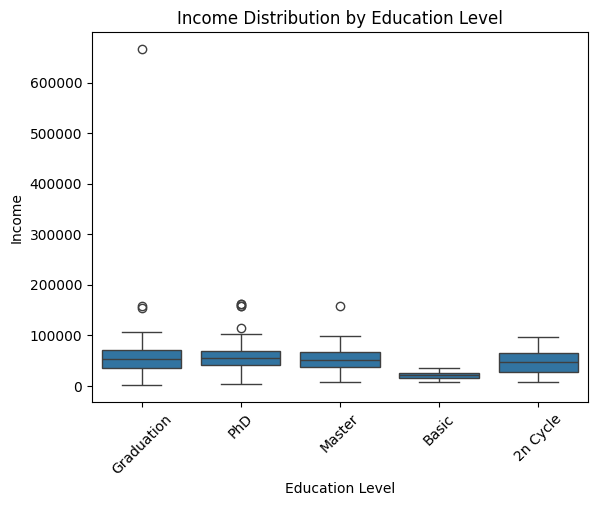

In [87]:
sns.boxplot( x = 'Education', y = 'Income', data = df)
plt.xticks(rotation = 45)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

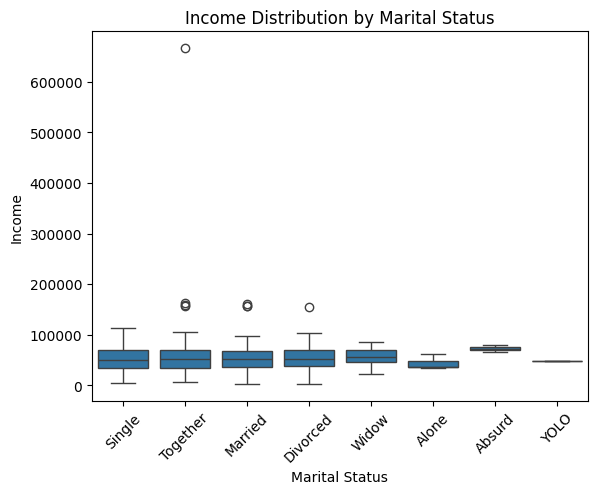

In [90]:
sns.boxplot( x = 'Marital_Status', y = 'Income', data = df)
plt.xticks(rotation = 45)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

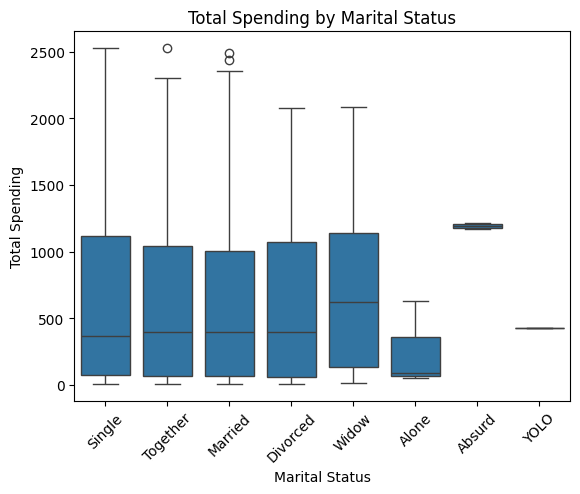

In [91]:
sns.boxplot( x = 'Marital_Status', y = 'Total Spending', data = df)
plt.xticks(rotation = 45)
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

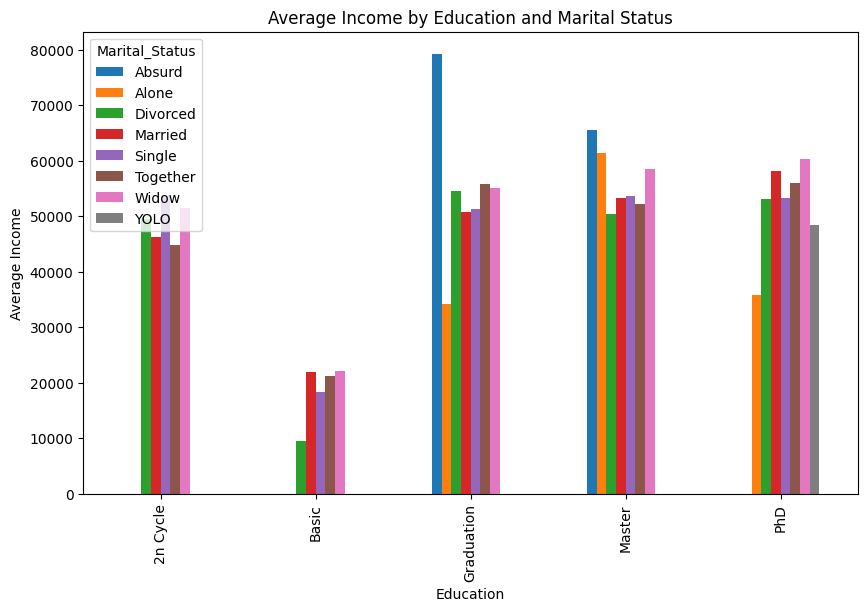

In [96]:
pivot_income = df.pivot_table(index = 'Education', columns = 'Marital_Status', values = 'Income', aggfunc = 'mean')
pivot_income.plot(kind='bar', figsize=(10, 6))
plt.title('Average Income by Education and Marital Status')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.show()

In [102]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

In [103]:
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

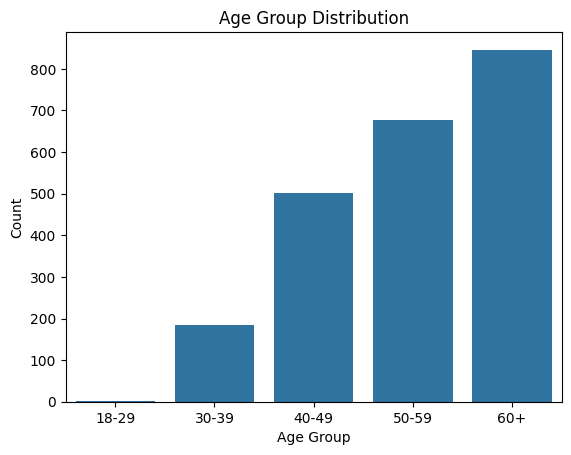

In [104]:
sns.countplot(x = 'Age Group', data = df)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

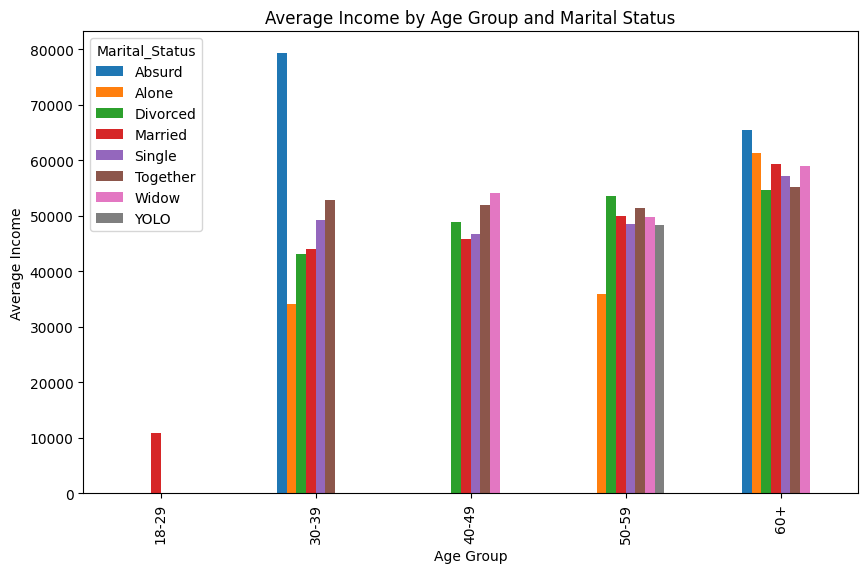

In [106]:
pivot_table = df.pivot_table(index = 'Age Group', columns = 'Marital_Status', values = 'Income', aggfunc = 'mean')
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group and Marital Status')
plt.show()

# Machine Learning and Training:

In [147]:
# importing required libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2216 non-null   int64   
 1   Education                       2216 non-null   object  
 2   Marital_Status                  2216 non-null   object  
 3   Income                          2216 non-null   float64 
 4   Recency                         2216 non-null   int64   
 5   NumDealsPurchases               2216 non-null   int64   
 6   NumWebPurchases                 2216 non-null   int64   
 7   NumCatalogPurchases             2216 non-null   int64   
 8   NumStorePurchases               2216 non-null   int64   
 9   NumWebVisitsMonth               2216 non-null   int64   
 10  Complain                        2216 non-null   int64   
 11  Z_CostContact                   2216 non-null   int64   
 12  Z_Revenue                

In [114]:
features = ['Age', 'Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Total Spending', 'Marketing Campaigns Acceptance']

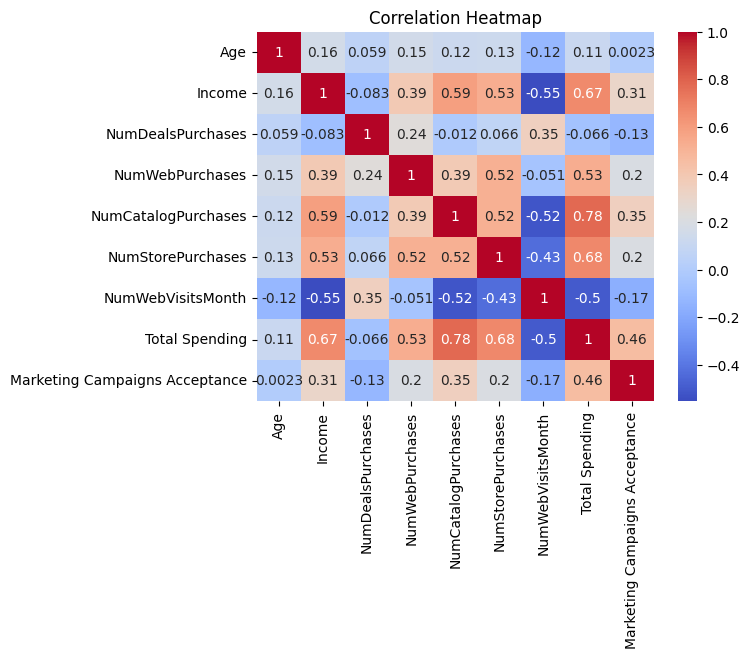

In [115]:
correlation = df[features].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [120]:
X = df[features].copy()

In [122]:
X.head()

,Age,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total Spending,Marketing Campaigns Acceptance
0,68,58138.0,3,8,10,4,7,1617,0
1,71,46344.0,2,1,1,2,5,27,0
2,60,71613.0,1,8,2,10,4,776,0
3,41,26646.0,2,2,0,4,6,53,0
4,44,58293.0,5,5,3,6,5,422,0


In [123]:
Scaler = StandardScaler()

In [124]:
X_Scaled = Scaler.fit_transform(X)

In [126]:
X_Scaled

array([[ 0.98644293,  0.2340627 ,  0.35171348, ...,  0.69323197,
         1.67548812, -0.43926491],
       [ 1.23680074, -0.23455948, -0.1682312 , ..., -0.1315745 ,
        -0.96235832, -0.43926491],
       [ 0.31882209,  0.76947764, -0.68817587, ..., -0.54397773,
         0.28024985, -0.43926491],
       ...,
       [-1.01641959,  0.18809052, -0.68817587, ...,  0.28082874,
         1.05169551,  1.03336905],
       [ 1.06989553,  0.67538765, -0.1682312 , ..., -0.95638097,
         0.39140438, -0.43926491],
       [ 1.23680074,  0.02470453,  0.35171348, ...,  0.69323197,
        -0.7218    , -0.43926491]])

In [131]:
wcss = []

In [132]:
for i in range(3,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_Scaled)
  wcss.append(kmeans.inertia_)

In [135]:
wcss

[11347.518977444912,
 10139.32352141056,
 9419.826541760283,
 8701.588228631595,
 8337.530341124198,
 8157.483133670439,
 7820.093628302589,
 7476.809361741414]

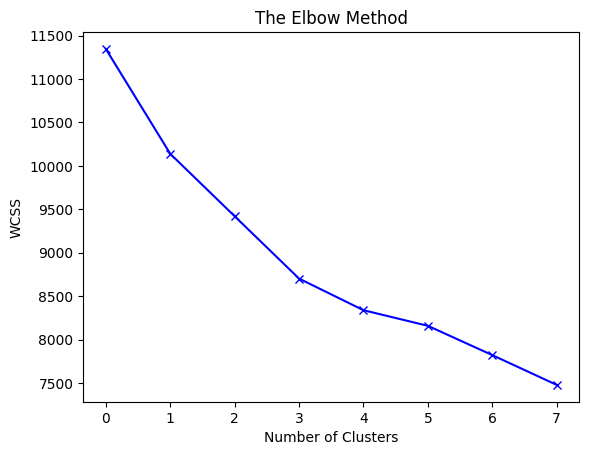

In [136]:
plt.plot(wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [137]:
kmeans = KMeans(n_clusters = 5)
df['cluster'] = kmeans.fit_predict(X_Scaled)

In [139]:
df['cluster'].nunique()

5

In [140]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Customer Since,Total Children,Marketing Campaigns Acceptance,Age Group,cluster
0,5524,Graduation,Single,58138.0,58,3,8,10,4,7,0,3,11,1,68,1617,4743,0,0,60+,1
1,2174,Graduation,Single,46344.0,38,2,1,1,2,5,0,3,11,0,71,27,4193,2,0,60+,0
2,4141,Graduation,Together,71613.0,26,1,8,2,10,4,0,3,11,0,60,776,4392,0,0,60+,1
3,6182,Graduation,Together,26646.0,26,2,2,0,4,6,0,3,11,0,41,53,4219,1,0,40-49,0
4,5324,PhD,Married,58293.0,94,5,5,3,6,5,0,3,11,0,44,422,4241,1,0,40-49,4


In [143]:
cluster_summary = df.groupby('cluster')[features].mean()

In [145]:
cluster_summary

,Age,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total Spending,Marketing Campaigns Acceptance
cluster,,,,,,,,,
0,53.662338,34445.761239,1.869131,2.065934,0.541459,3.226773,6.375624,95.737263,0.082917
1,60.561446,62895.744578,2.513253,7.337349,3.790361,8.653012,5.431325,943.387952,0.221687
2,57.326241,75875.628842,1.283688,4.186761,5.846336,8.241135,2.160757,1244.747045,0.264775
3,54.722222,85747.547619,1.206349,5.468254,6.150794,8.126984,3.492063,1590.809524,2.507937
4,57.772908,48997.553785,6.135458,5.896414,2.215139,6.071713,7.159363,521.792829,0.231076


In [146]:
df['cluster'].value_counts()

,count
cluster,
0,1001
2,423
1,415
4,251
3,126


In [150]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_Scaled)

In [151]:
pca_data

array([[ 1.91387863,  1.33027577],
       [-1.51237632, -0.65226834],
       [ 1.42591351,  0.24558758],
       ...,
       [ 1.33866617, -0.65290231],
       [ 1.8540155 ,  0.19238263],
       [-1.12464649,  0.51624808]])

In [152]:
df['pca_1'], df['pca_2'] = pca_data[:, 0], pca_data[:, 1]

In [153]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Customer Since,Total Children,Marketing Campaigns Acceptance,Age Group,cluster,pca_1,pca_2
0,5524,Graduation,Single,58138.0,58,3,8,10,4,7,0,3,11,1,68,1617,4743,0,0,60+,1,1.913879,1.330276
1,2174,Graduation,Single,46344.0,38,2,1,1,2,5,0,3,11,0,71,27,4193,2,0,60+,0,-1.512376,-0.652268
2,4141,Graduation,Together,71613.0,26,1,8,2,10,4,0,3,11,0,60,776,4392,0,0,60+,1,1.425914,0.245588
3,6182,Graduation,Together,26646.0,26,2,2,0,4,6,0,3,11,0,41,53,4219,1,0,40-49,0,-2.018082,-0.542582
4,5324,PhD,Married,58293.0,94,5,5,3,6,5,0,3,11,0,44,422,4241,1,0,40-49,4,-0.101016,0.960764


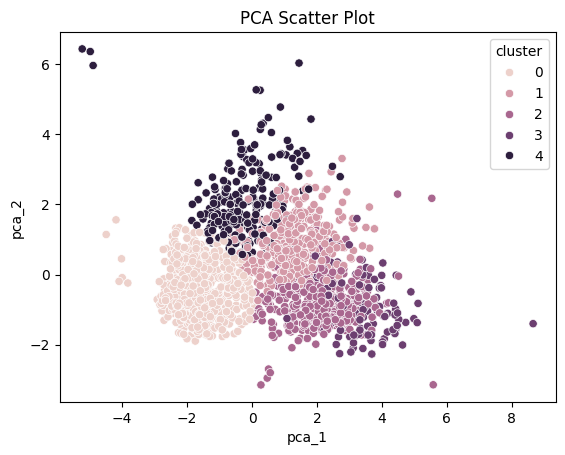

In [154]:
sns.scatterplot(x = 'pca_1', y = 'pca_2', hue = 'cluster', data = df)
plt.title('PCA Scatter Plot')
plt.show()

# Saving Models:

In [155]:
# importing required libraries

import joblib

In [157]:
kmean_model = joblib.dump(kmeans, 'kmeans_model.pkl')
scaler_model = joblib.dump(Scaler, 'scaler_model.pkl')

In [158]:
kmean_model

['kmeans_model.pkl']

In [159]:
scaler_model

['scaler_model.pkl']